In [1]:
import matplotlib
matplotlib.use('TkAgg')  # Use the TkAgg backend (or another appropriate one)
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from hugalaxy import  calculate_density_parameters
from hugalaxy import GalaxyWrapper, plotRotationCurve, calculate_density_parameters
from timeit import default_timer as timer

In HU, the distance is given by
$d(z) = R_0 \frac{z}{(1+z)}$

the 4D radius is given by:
$R(z) = R_0 \frac{1}{(1+z)}$

where $R_0$ = 14.01 GLY
$G(t) = G_0\frac{R_0}{R(z)}$

$G = G_0 (1+z)$

Using Newtonian Dynamics while reversing time (having the average galaxy moving back in time and through the 4D spatial manifold), we get:
$G(z)\frac{M}{r(z)^2} = \frac{v(z)^2}{r(z)}$

r(z)=$G(z)\frac{M}{v(z)^2}=G_0 (1+z)\frac{M}{v(z)^2}$

Since the angular size of a galaxy is roughly r(z)/d(z)

AngularSize= $G_0 (1+z)\frac{M}{v(z)^2}/(R_0\frac{z}{(1+z)})= \frac{G_0M(1+z)^2}{R_0  z v(z)^2} \propto \frac{1}{z}$

This means that v(z) =$ v_0(1+z)$ which implies that $r(z) = r_0/(1+z)$

where $R_0$ is the current 4D radius (14.01 GLY), and $v_0$ is the current tangential velocity of a body in orbit.

So, as G varies, the radius of the orbits varies, and velocity adjusts to keep angular momentum constant. The resulting angular size z-dependency is $\frac{1}{z} $as depicted in Kapahi’s data.

**NOTICE THAT THIS IS NOT A SMALL RESULT. I DERIVED THE Z-DEPENDENCY OF THE ANGULAR SIZE (AN OBSERVABLE) IN AN EPOCH-DEPENDENT G. THIS HAS NEVER BEEN DONE, AND IT SUPPORTS MY THEORY AND DEBUNKS GENERAL RELATIVITY.**

**JWST'S OBSERVATION OF HUGE GALAXIES IS THE RESULT OF INCORRECT GALAXY SIZE PREDICTIONS AND DISTRIBUTION DUE TO RIEMMANIAN GEOMETRY: NO IFS OR BUTS.**


In [2]:
def calc_volume(n, mem={0: 1, 1: 2}):
    # Check if the result is already in the memory dictionary
    if n in mem:
        return mem[n]
    
    # Otherwise, calculate it recursively and store it in the dictionary
    else:
        mem[n] = (2 * math.pi / n) * calc_volume(n-2)
        return mem[n]
        
# To calculate and print the volumes up to n=10:


def sumvolume(nn):
    totalvolume = 0.0
    for i in range(nn):
        totalvolume+=calc_volume(i)
    return totalvolume
 
n1= 100
n2 = 1000
print(f'V({n1}) - V({n2}) = {sumvolume(n1)-sumvolume(n2)}')


V(100) - V(1000) = 0.0


In [3]:
n=54
sumvolume(n+1)#-sumvolume(n)


45.99932608938283

In [4]:
def UniverseDimensionalityDistribution():
    NormalizationFactor = sumvolume(55)
    nU = np.zeros(20)
    for i in np.arange(20):
        nU[i] = calc_volume(i)
    return nU/NormalizationFactor

distribution = UniverseDimensionalityDistribution()
dimensionality = np.arange(len(distribution))
plt.bar(dimensionality, distribution)
plt.xlabel("Number of Spatial Dimensions")
plt.ylabel("Probability")
plt.xlim(0,10)
plt.ylim(0,0.12)
plt.title("Universe's Dimensionality Prob. Distribution")      
plt.savefig("./Figures/UniverseDimensionality.png")
plt.show()

In [5]:
df = pd.DataFrame(columns=["rho_0","alpha_0", "rho_1", "alpha_1", "h0"])

for redshift_birth in np.arange(0,35,1):
    df.loc[redshift_birth] = calculate_density_parameters(redshift_birth)
r4d = 14/(1+df.index)
df["redshift_birth"]=df.index
df["r4d"]=r4d


In [6]:
fig, axs = plt.subplots(1, 5, figsize=(15, 6))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot each column versus redshift_birth
for i, column in enumerate(["rho_0","alpha_0", "rho_1", "alpha_1", "h0"]):
    axs[i].plot(df["r4d"], df[column])
    axs[i].set_xlabel("4D Radius")
    axs[i].set_ylabel(column)
    axs[i].set_title(column)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')

plt.tight_layout()
plt.show()

In [7]:
# Assuming you have the DataFrame df with the required columns

# Calculate log(r4d) column
df['log_r4d'] = np.log10(14 / (1 + df['redshift_birth']))

# Define the degree of the polynomial fit
degree = 1

# Create an empty dictionary to store the fitting coefficients
fitting_coeffs = {}

# Loop over the columns to calculate the fitting coefficients
for column in ['rho_0', 'alpha_0', 'rho_1', 'alpha_1', 'h0']:
    # Calculate log(column) column
    df['log_' + column] = np.log10(df[column])

    # Perform the polynomial fit using numpy.polyfit
    fit_coeffs = np.polyfit(df['log_r4d'], df['log_' + column], degree)

    # Store the fitting coefficients in the dictionary
    fitting_coeffs[column] = fit_coeffs

# Print the fitting coefficients
for column, coeffs in fitting_coeffs.items():
    print(f'Fitting coefficients for log({column}) versus log(r4d):')
    print('Slope:', coeffs[0])
    print('Intercept:', coeffs[1])
    print()


Fitting coefficients for log(rho_0) versus log(r4d):
Slope: -2.979137077034973
Intercept: 4.662143895661162

Fitting coefficients for log(alpha_0) versus log(r4d):
Slope: -0.9962401859242193
Intercept: -2.1847012765207023

Fitting coefficients for log(rho_1) versus log(r4d):
Slope: -3.003871067157709
Intercept: 2.619664468399843

Fitting coefficients for log(alpha_1) versus log(r4d):
Slope: -1.0037795630256452
Intercept: -3.510177916755981

Fitting coefficients for log(h0) versus log(r4d):
Slope: 0.9868817849104307
Intercept: 4.016252574205797



In [9]:
plt.scatter(x,y)
plt.plot(x_new,y_new)
plt.show()

(21, 2)
(100, 2)
Compute Choice CPU_TaskFlow
Total Error = 265.502
Total Error = 22148.9
Total Error = 20553.1
Total Error = 5737.72
Total Error = 1427.94
Total Error = 265.502
Total Error = 2792.75
Total Error = 7.0318e+06
Total Error = 7987.66
Total Error = 106208
Total Error = 2248.92
Total Error = 9239.14
Total Error = 1323
Total Error = 6884.3
Total Error = 867.603
Total Error = 10026.3
Total Error = 740.866
Total Error = 5598.16
Total Error = 580.096
Total Error = 2213.81
Total Error = 482.219
Total Error = 1047.44
Total Error = 444.675
Total Error = 1917.37
Total Error = 354.929
Total Error = 962.021
Total Error = 353.385
Total Error = 668.365
Total Error = 320.032
Total Error = 289.16
Total Error = 395.925
Total Error = 276.589
Total Error = 262.564
Total Error = 479.178
Total Error = 320.199
Total Error = 256.52
Total Error = 458.317
Total Error = 228.764
Total Error = 302.414
Total Error = 242.506
Total Error = 227.854
Total Error = 254.526
Total Error = 246.955
Total Error =

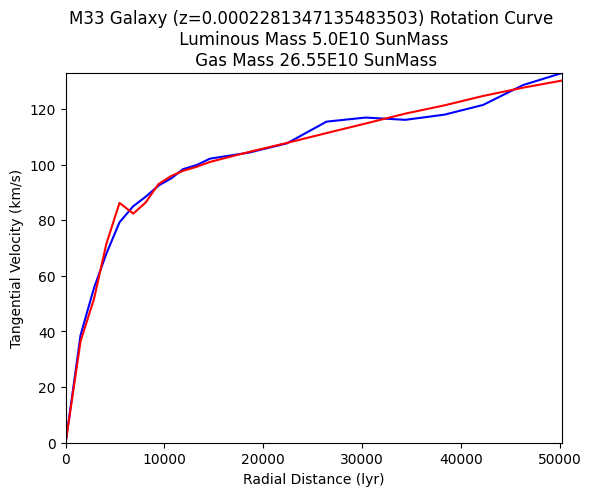

In [1]:
####################################################
# MODELING M33 GALAXY
####################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hugalaxy import GalaxyWrapper, plotRotationCurve
from hugalaxy import  move_rotation_curve, calculate_density_parameters
from timeit import default_timer as timer

m33_rotational_curve = np.array( [
    [0.0, 0.0],
    [1508.7187, 38.674137],
    [2873.3889, 55.65067],
    [4116.755, 67.91063],
    [5451.099, 79.22689],
    [6846.0957, 85.01734],
    [8089.462, 88.38242],
    [9393.48, 92.42116],
    [10727.824, 95.11208],
    [11880.212, 98.342697],
    [13275.208, 99.82048],
    [14609.553, 102.10709],
    [18521.607, 104.25024],
    [22403.336, 107.60643],
    [26406.369, 115.40966],
    [30379.076, 116.87875],
    [34382.107, 116.05664],
    [38354.813, 117.93005],
    [42266.87, 121.42091],
    [46300.227, 128.55017],
    [50212.285, 132.84966]
])

print(np.shape(m33_rotational_curve))
x = m33_rotational_curve[:,0]
y=m33_rotational_curve[:,1]

# Values of x for which we need interpolated y
x_new = np.linspace(0, np.max(x), num=100, endpoint=True)

# Interpolated y values
y_new = np.interp(x_new, x, y)

new_m33_rotational_curve = np.array([x_new, y_new]).T
print(np.shape(new_m33_rotational_curve))


M33_Distance = 3.2E6
Radius_Universe_4D = 14.03E9
redshift = M33_Distance / (Radius_Universe_4D - M33_Distance)
nr = 300
# NZ should always be ODD
nz = 101
ntheta = 180
R_max = 50000.0

rho_0, alpha_0, rho_1, alpha_1, h0 = calculate_density_parameters(redshift)
GalaxyMass = 5E10
# Create The Galaxy
M33 = GalaxyWrapper(GalaxyMass, rho_0, alpha_0, rho_1, alpha_1, h0, R_max, nr,
                    nz, ntheta, redshift,GPU_ID=0, cuda=False, taskflow=True)
# Load the new rotation curve
M33.read_galaxy_rotation_curve(m33_rotational_curve)
# Simulate the new curve
a = M33.simulate_rotation_curve()
# Plot it
# plotRotationCurve(M33)
# df = pd.DataFrame(columns=["rho_0","alpha_0", "rho_1", "alpha_1", "h0"])

# for redshift_birth in np.arange(0,35,1):
#     r4d = 14/(1+redshift_birth)
#     M33.redshift=redshift_birth
#     M33.rho_0, M33.alpha_0, M33.rho_1, M33.alpha_1, M33.h0 = calculate_density_parameters(redshift_birth)
#     new_rotation_curve = move_rotation_curve(m33_rotational_curve, redshift, redshift_birth )
#     M33.read_galaxy_rotation_curve(new_rotation_curve)
#     values = M33.move_galaxy(True)
#     df.loc[redshift_birth] = values
# r4d = 14/(1+df.index)
# df["redshift_birth"]=df.index
# df["r4d"]=r4d

plotRotationCurve(M33)


In [12]:
a = M33.simulate_rotation_curve()
plotRotationCurve(M33)

Compute Choice GPU_Torch_Chunks
Total Error = 877.182
Total Error = 97982.6
Total Error = 107004
Total Error = 35507.7
Total Error = 7824.49
Total Error = 877.182
Total Error = 40500.7
Total Error = 179319
Total Error = 18443.3
Total Error = 704655
Total Error = 11771.8
Total Error = 51878.5
Total Error = 7823.87
Total Error = 44994.3
Total Error = 4002.37
Total Error = 52951.9
Total Error = 3887.72
Total Error = 33121.7
Total Error = 2489.33
Total Error = 12336.3
Total Error = 2286.76
Total Error = 8461.37
Total Error = 1446.29
Total Error = 8292.67
Total Error = 1603.2
Total Error = 5105.12
Total Error = 1220.81
Total Error = 3371.18
Total Error = 1164.05
Total Error = 2692.93
Total Error = 1012.98
Total Error = 1745.29
Total Error = 1022.94
Total Error = 1558.23
Total Error = 950.152
Total Error = 1355.07
Total Error = 942.124
Total Error = 1110.03
Total Error = 912.936
Total Error = 1109.47
Total Error = 907.945
Total Error = 986.82
Total Error = 895.545
Total Error = 977.256
Total

In [29]:
M33.calculate_mass(rho_0,alpha_0, h0), M33.calculate_mass(rho_1,alpha_1, h0)

(50019481272.27128, 197946513464.7325)

In [ ]:
M33.cuda=True
M33.taskflow=True

m33_rotational_curve = np.array( [
    [0.0, 0.0],
    [1508.7187, 38.674137],
    [2873.3889, 55.65067],
    [4116.755, 67.91063],
    [5451.099, 79.22689],
    [6846.0957, 85.01734],
    [8089.462, 88.38242],
    [9393.48, 92.42116],
    [10727.824, 95.11208],
    [11880.212, 98.342697],
    [13275.208, 99.82048],
    [14609.553, 102.10709],
    [18521.607, 104.25024],
    [22403.336, 107.60643],
    [26406.369, 115.40966],
    [30379.076, 116.87875],
    [34382.107, 116.05664],
    [38354.813, 117.93005],
    [42266.87, 121.42091],
    [46300.227, 128.55017],
    [50212.285, 132.84966]
])

M33_Distance = 3.2E6
Radius_Universe_4D = 14.03E9
redshift = M33_Distance / (Radius_Universe_4D - M33_Distance)

for redshift_birth in np.arange(0,140,20):
    r4d = 14/(1+redshift_birth)
    M33.redshift=redshift_birth
    M33.rho_0, M33.alpha_0, M33.rho_1, M33.alpha_1, M33.h0 = calculate_density_parameters(redshift_birth)
    new_rotation_curve = move_rotation_curve(m33_rotational_curve, redshift, redshift_birth )
    M33.read_galaxy_rotation_curve(new_rotation_curve)
    values = M33.move_galaxy_redshift(redshift_birth)
    rho = M33.density_wrapper(M33.rho_0, M33.alpha_0, M33.rho_1, M33.alpha_1,M33.r,M33.z)
    M33.v_rotation_points    = M33.calculate_rotational_velocity(rho,0.0)
    plotRotationCurve(M33)
    

In [ ]:
np.shape(M33.v_rotation_points)

In [ ]:
M33.calculate_rotational_velocity(rho,0.0)

In [ ]:
np.shape(rho)

In [ ]:
a =M33.calculate_rotational_velocity(rho,0.0)

In [ ]:
np.shape(a)

In [ ]:
M33.v_rotation_points


In [ ]:
plt.plot(rho)
plt.show()

In [ ]:
np.shape(rho)

In [ ]:
# Initial Density Parameters
M33.print_density_parameters()

In [ ]:
calculate_density_parameters(new_redshift)

In [ ]:
M33.v_rotation_points

In [ ]:
# Prepare Galaxy shift to the new position (new redshift)
new_redshift=2
M33.rotation_curve = move_rotation_curve(M33.rotation_curve, M33.redshift, new_redshift )
M33.move_galaxy_redshift(new_redshift)
M33.simulate_rotation_curve()
# Plot it
plotRotationCurve(M33)

In [ ]:
# Final Density Parameters
M33.print_density_parameters()

In [ ]:
calculate_density_parameters(redshift)

In [ ]:
redshift=139
time_step_years = 10E6
eta = 1/100
temperature =7
current_masses = M33.DrudePropagator( redshift,  time_step_years,  eta,  temperature)

In [ ]:
M33.redshift

In [ ]:
M33.rho_0, M33.alpha_0, M33.rho_1, M33.alpha_1, M33.h0